# Imersão Alura

Projeto desenvolvido durante a Imersão Alura de Data Science, com o objetivo de explorar, tratar e visualizar dados. Foram aplicadas técnicas de limpeza, análise exploratória e visualização de dados, além da criação de um *dashboard* interativo para facilitar a interpretação dos resultados.

Os objetivos são:

1. Importar e explorar dados.

2. Tratar inconsistências, valores ausentes e padronizar formatos.

3. Criar visualizações estáticas (gráficos e tabelas) e dinâmicas (interativas).

4. Desenvolver um dashboard web para análise interativa dos dados.

## Aula 1 - Análise de Dados com Pandas


Na **primeira aula** do projeto, será abordada a **importação da base de dados** e a execução dos **passos iniciais da análise de dados**. Nessa etapa, trabalharemos na leitura do arquivo, exploraremos suas primeiras linhas e dimensões, identificaremos o tipo de cada variável e realizaremos um diagnóstico inicial da qualidade dos dados. Esse momento é essencial para compreender a estrutura da base, levantar hipóteses e planejar os próximos passos da análise, garantindo que todo o processo posterior seja construído sobre uma base sólida e bem compreendida.


In [1]:
# Importando a biblioteca Pandas
import pandas as pd

In [4]:
# Base de Dados Disponibilizada pela ALURA
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [5]:
# Exibindo os dados
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [6]:
# Função para explorar o conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [7]:
# Descrevendo os dados estatisticamente
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [8]:
# Exibindo linhas e colunas
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [9]:
# Exibindo o nome das colunas
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Renomeando as colunas do DataFrame

In [10]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'Ano',
    'experience_level': 'Senioridade',
    'employment_type': 'Contrato',
    'job_title': 'Cargo',
    'salary': 'Salario',
    'salary_currency': 'Moeda',
    'salary_in_usd': 'USD',
    'employee_residence': 'Residencia',
    'remote_ratio': 'Remoto',
    'company_location': 'Empresa',
    'company_size': 'Porte'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Porte
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


### Tratando as Colunas Categóricas

#### Nível de senioridade

In [12]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['Senioridade'].value_counts()

,count
Senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


| Sigla | Significado | Descrição                                 |
|-------|-------------|--------------------------------------------|
| SE    | Senior      | Profissional experiente (nível sênior)     |
| MI    | Mid         | Nível intermediário                        |
| EN    | Entry       | Iniciante ou júnior (entry-level)          |
| EX    | Executive   | Executivo, liderança sênior (C-Level)      |


#### Tipo de contrato

In [13]:
df['Contrato'].value_counts()

,count
Contrato,
FT,132563
CT,394
PT,376
FL,16


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| FT    | Full-time    | Tempo integral – trabalho padrão de 40h/semana ou período completo   |
| PT    | Part-time    | Meio período – carga horária reduzida                                |
| CT    | Contract     | Contrato temporário ou por projeto – geralmente por prazo determinado|
| FL    | Freelance    | Freelancer – trabalho autônomo ou por demanda, sem vínculo formal    |


#### Regime de trabalho

In [14]:
df['Remoto'].value_counts()

,count
Remoto,
0,105312
100,27718
50,319


O modelo remoto permite trabalhar de qualquer lugar sem precisar ir à empresa. O modelo presencial exige ir até o escritório todos os dias. O híbrido mistura os dois modelos. O modelo 'everywhere' é mais raro e permite trabalhar de qualquer lugar do mundo sem restrição de país ou cidade.

| Sigla | Significado |
|-------|-------------|
| 0     | Presencial  |
| 100   | Remoto      |
| 50    | Híbrido     |

#### Tamanho da empresa

In [15]:
df['Porte'].value_counts()

,count
Porte,
M,129561
L,3574
S,214


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| M   | Medium    | Empresa de tamanho médio|
| L    | Large    | Empresa de tamanho grande                                |
| S    | Small    | Empresa de tamanho pequeno|


### Modificando o nome das categorias:

In [16]:
Senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['Senioridade'] = df['Senioridade'].replace(Senioridade)
df['Senioridade'].value_counts()

,count
Senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [17]:
Contrato = {
    'FT': 'Integral',
    'PT': 'Parcial',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}
df['Contrato'] = df['Contrato'].replace(Contrato)
df['Contrato'].value_counts()

,count
Contrato,
Integral,132563
Contrato,394
Parcial,376
Freelancer,16


In [18]:
Porte = {
    'L': 'Grande',
    'S': 'Pequena',
    'M':	'Media'

}
df['Porte'] = df['Porte'].replace(Porte)
df['Porte'].value_counts()

,count
Porte,
Media,129561
Grande,3574
Pequena,214


In [19]:
Regime = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Hibrido'
}

df['Remoto'] = df['Remoto'].replace(Regime)
df['Remoto'].value_counts()

,count
Remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [20]:
df.head()

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Porte
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


Podemos também resumir as informações categóricas com o método `describe()`, exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [21]:
df.describe(include='object')

,Senioridade,Contrato,Cargo,Moeda,Residencia,Remoto,Empresa,Porte
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


Questões Norteadoras do Projeto:

* Qual o nível de experiência mais comum na base de dados?
* Qual é o tipo de contrato mais frequente?
* Qual o cargo mais frequente na amostra?
* De qual país são a maioria dos profissionais da base?
* Qual é o país onde mais empresas da amostra estão sediadas?
* Qual o regime de trabalho mais comum?
* Qual é o tamanho mais comum das empresas na amostra?

## Aula 2 - Preparação e limpeza dos Dados




Na **segunda aula**, foi o início ao processo de **limpeza e tratamento dos dados**, etapa fundamental para garantir a qualidade das análises. Nessa fase, iremos identificar e lidar com valores ausentes, remover duplicatas, corrigir inconsistências e padronizar formatos. Além disso, faremos a transformação de variáveis para facilitar a interpretação e a criação de visualizações, preparando assim a base para as próximas etapas do projeto.


In [22]:
# verificar onde existem valores nulos (NaN) em um DataFrame.
df.isnull()

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Porte
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
# contar quantos valores nulos existem em cada coluna de um DataFrame.
df.isnull().sum()

,0
Ano,10
Senioridade,0
Contrato,0
Cargo,0
Salario,0
Moeda,0
USD,0
Residencia,0
Remoto,0
Empresa,0


In [24]:
# retorna todos os valores únicos existentes na coluna
df['Ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
# filtrar e mostrar apenas as linhas que possuem pelo menos um valor nulo no DataFrame
df[df.isnull().any(axis=1)]

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Porte
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [26]:
# Importando a biblioteca Numpy
import numpy as np

In [27]:
# Remove, por padrão, qualquer linha que tenha pelo menos um valor nulo (NaN).
df_limpo = df.dropna()

In [28]:
# Conferindo a limpeza do dataframe
df_limpo.isnull().sum()

,0
Ano,0
Senioridade,0
Contrato,0
Cargo,0
Salario,0
Moeda,0
USD,0
Residencia,0
Remoto,0
Empresa,0


In [29]:
df_limpo.head()

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Porte
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [32]:
# Converte os valores da coluna Ano, útil quando os valores estão como float ou string. O método assign substitui uma coluna no DataFrame.
df_limpo = df_limpo.assign(ano = df_limpo['Ano'].astype('int64'))

## Aula 3 - Visualização de Dados
Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados.

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='Senioridade'>

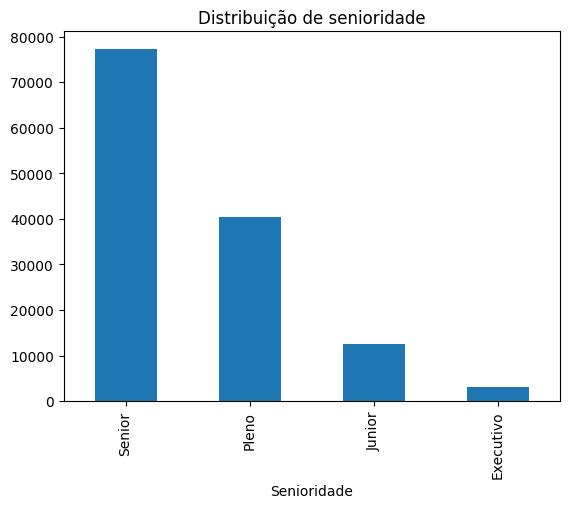

In [33]:
df_limpo['Senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")

In [34]:
# Importando a biblioteca Seaborn
import seaborn as sns

<Axes: xlabel='Senioridade', ylabel='USD'>

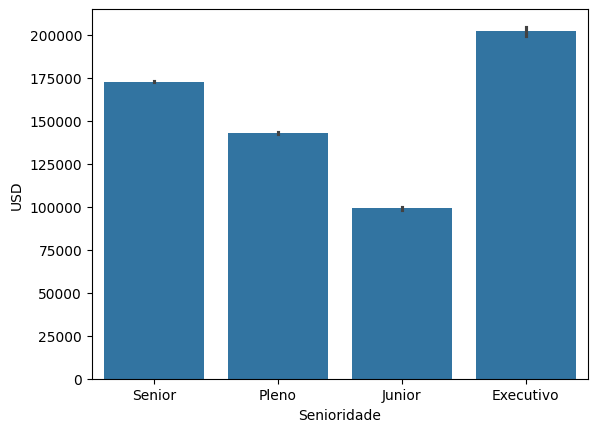

In [35]:
sns.barplot(data=df_limpo, x='Senioridade', y='USD')

In [36]:
# Importando a biblioteca Matplotlib
import matplotlib.pyplot as plt

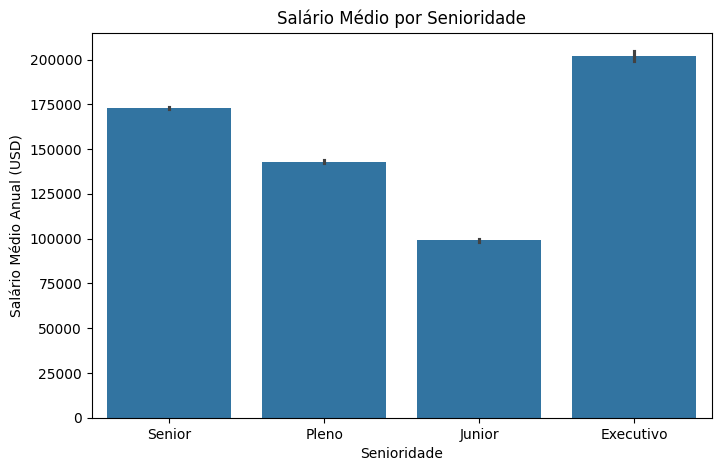

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='Senioridade', y='USD')
plt.title("Salário Médio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual (USD)")
plt.show()



In [38]:
df_limpo.groupby('Senioridade')['USD'].mean().sort_values(ascending=False)

,USD
Senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [39]:
ordem = df_limpo.groupby('Senioridade')['USD'].mean().sort_values(ascending=True).index

In [40]:
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='Senioridade')

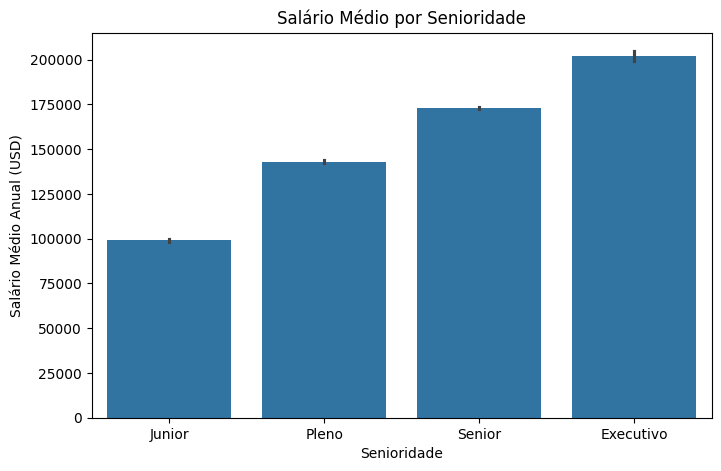

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='Senioridade', y='USD', order=ordem)
plt.title("Salário Médio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual (USD)")
plt.show()

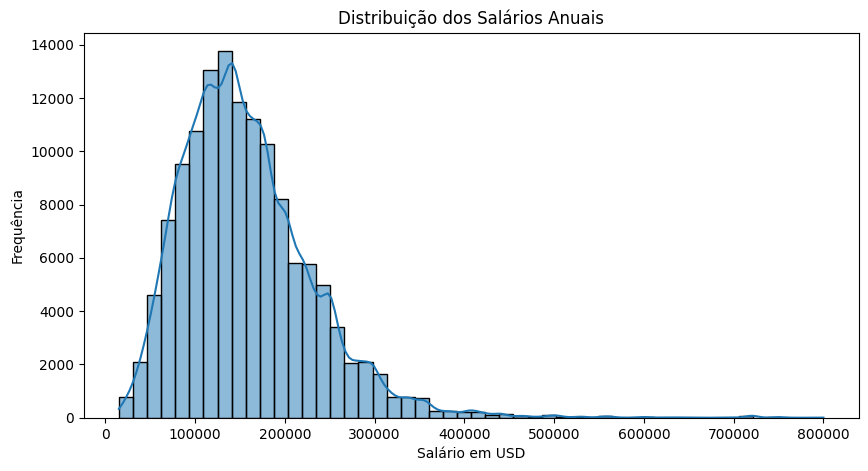

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['USD'], bins = 50, kde=True)
plt.title("Distribuição dos Salários Anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

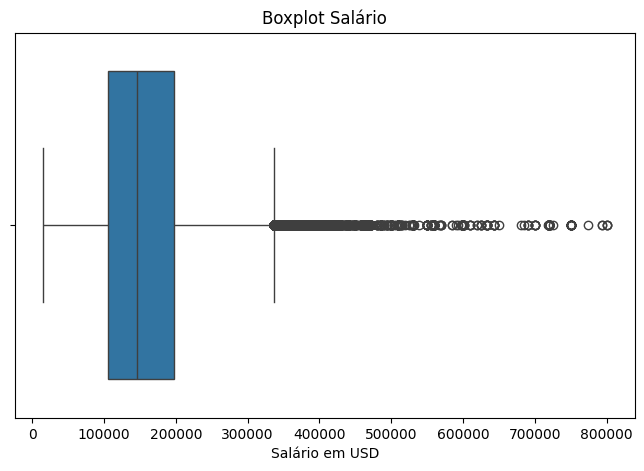

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['USD'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

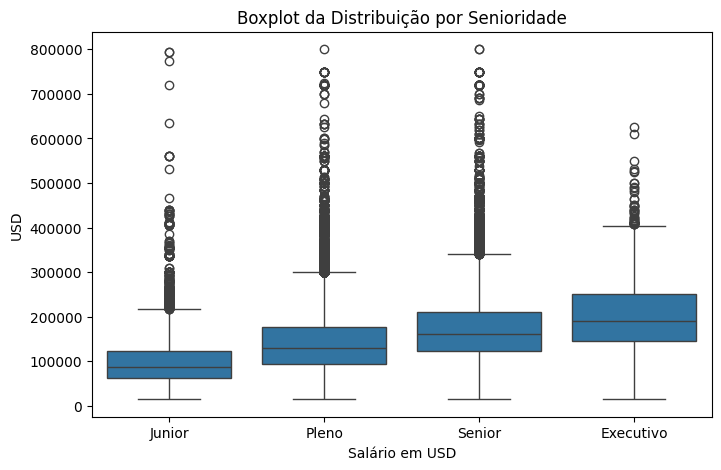

In [44]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='Senioridade', y='USD', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da Distribuição por Senioridade")
plt.xlabel("Salário em USD")
plt.show()


In [46]:
# Importando a biblioteca Plotly
import plotly.express as px

In [47]:
# Gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_limpo.groupby('Senioridade')['USD'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='Senioridade',
             y='USD',
             title='Média Salarial por Senioridade',
             labels={'Senioridade': 'Nível de Senioridade', 'USD': 'Média Salarial Anual (USD)'})

fig.show()

In [49]:
remoto_contagem = df_limpo['Remoto'].value_counts().reset_index()
remoto_contagem.columns = ['Modalidade', 'Quantidade']

fig = px.pie(remoto_contagem,
             names='Modalidade',
             values='Quantidade',
             title='Proporção De Modalidade de Trabalho'

          )

fig.show()

In [50]:
# Instalando a biblioteca Pycountry
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.6 MB/s eta 0:00:00


In [51]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['Residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['Cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['USD'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='USD',
                    color_continuous_scale='rdylgn',
                    title='Salário Médio de Cientista de Dados por País',
                    labels={'USD': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [52]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)